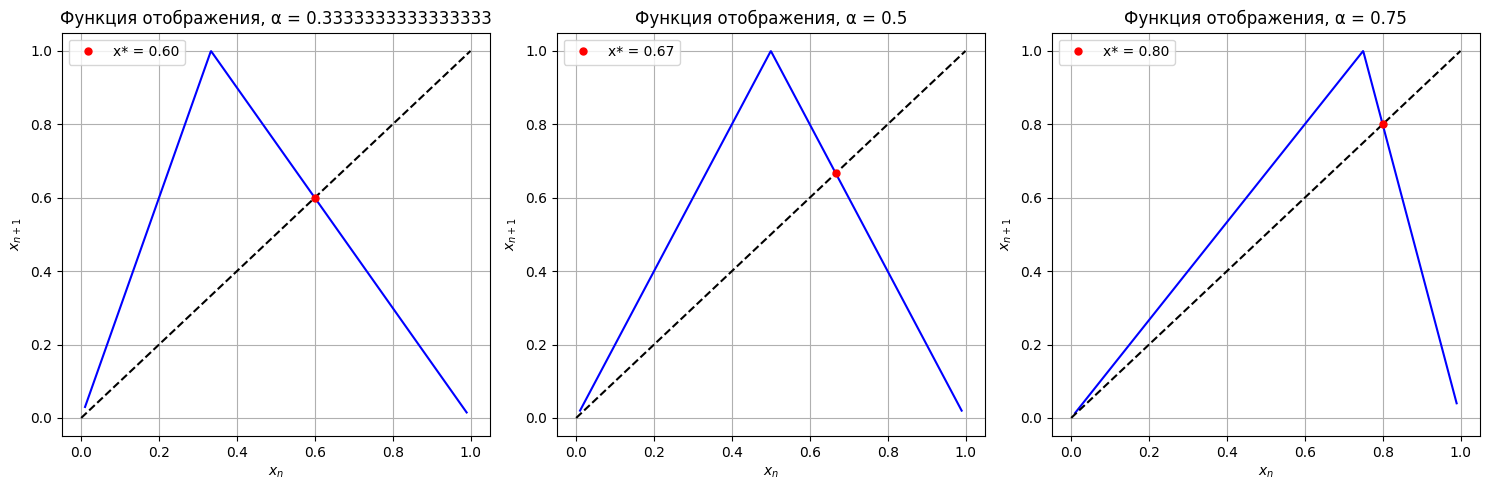

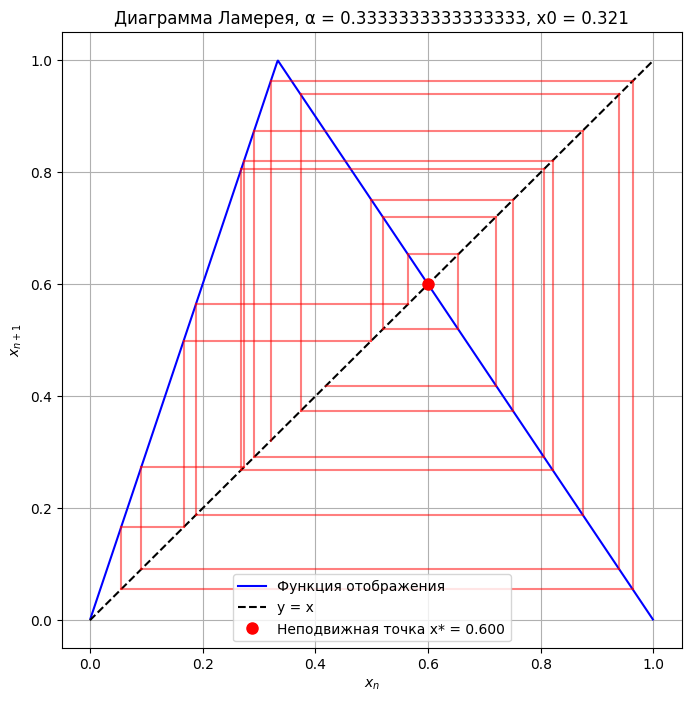

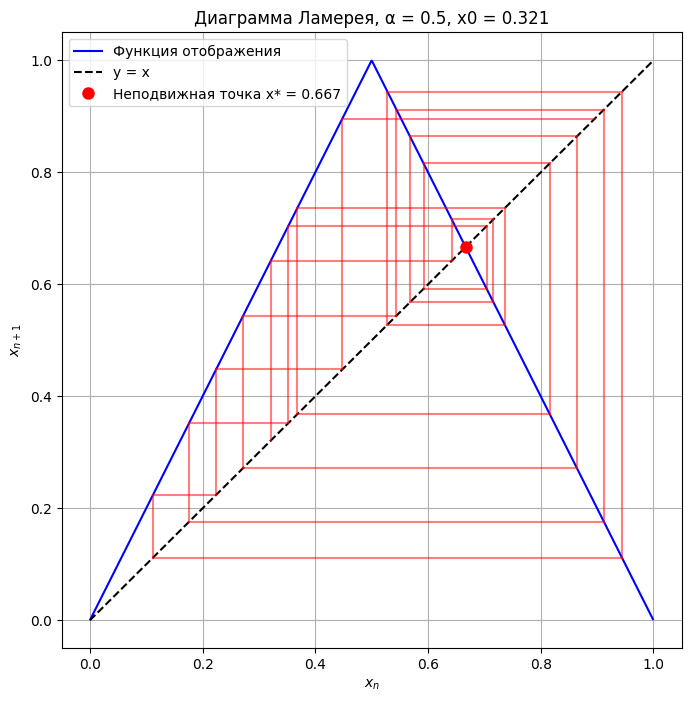

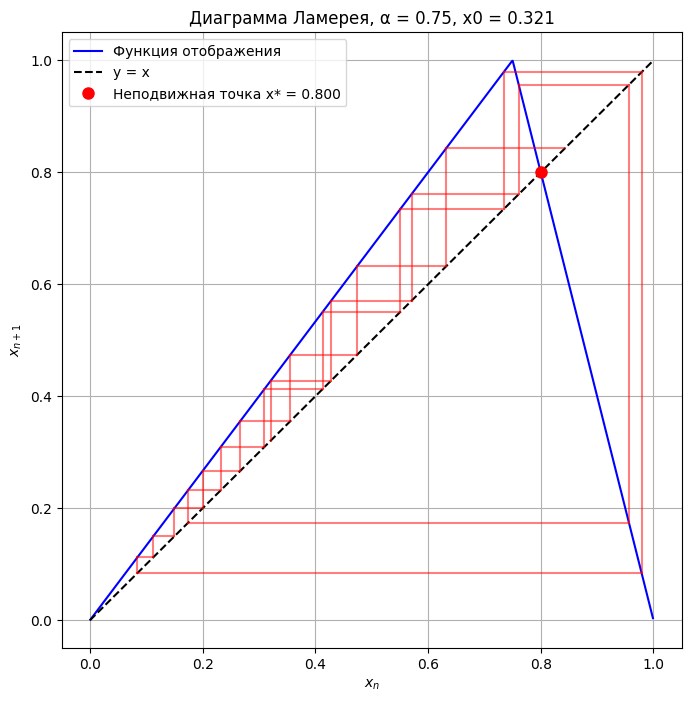

<Figure size 1200x800 with 0 Axes>

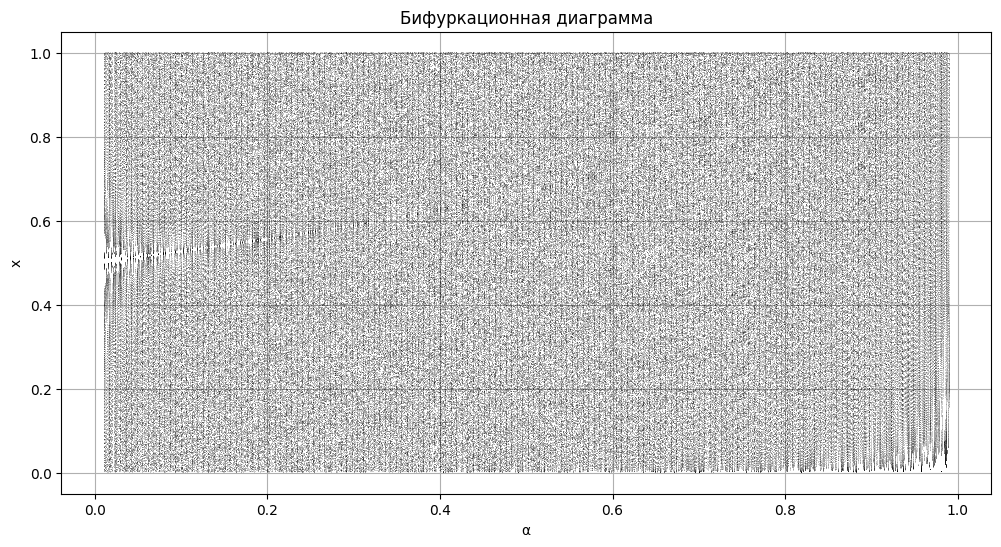

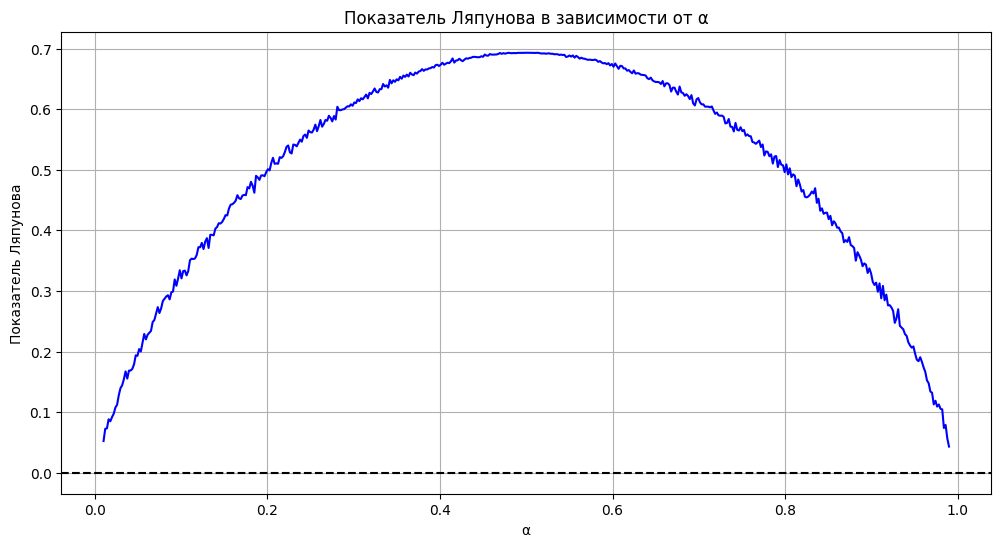

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def tent_map(x, alpha):
    if x < alpha:
        return x / alpha
    else:
        return (1 - x) / (1 - alpha)


def fixed_point(alpha):
    return 1 / (2 - alpha)


def plot_tent_maps():
    alphas = [1/3, 1/2, 3/4]
    x_values = np.linspace(0.01, 0.99, 1000)
    
    plt.figure(figsize=(15, 5))
    for i, alpha in enumerate(alphas, 1):
        plt.subplot(1, 3, i)
        y_values = [tent_map(x, alpha) for x in x_values]
        plt.plot(x_values, y_values, 'b-')
        plt.plot([0, 1], [0, 1], 'k--')  
        
        x_star = fixed_point(alpha)
        if alpha < x_star: 
            plt.plot(x_star, x_star, 'ro', markersize=5, label=f'x* = {x_star:.2f}')
        
        plt.title(f'Функция отображения, α = {alpha}')
        plt.xlabel('$x_n$')
        plt.ylabel('$x_{n+1}$')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()

#Ламерей
def plot_lameyre_diagram(alpha, n_iter=20, x0=0.321):
    x = np.linspace(0.001, 0.999, 1000)
    y = [tent_map(xi, alpha) for xi in x]
    
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'b-', label='Функция отображения')
    plt.plot([0, 1], [0, 1], 'k--', label='y = x')
    
    x_star = fixed_point(alpha)
    if alpha < x_star: 
        plt.plot(x_star, x_star, 'ro', markersize=8, label=f'Неподвижная точка x* = {x_star:.3f}')
    

    x_current = x0
    for _ in range(n_iter):
        y_current = tent_map(x_current, alpha)
        plt.plot([x_current, x_current], [x_current, y_current], 'r-', alpha=0.5)
        plt.plot([x_current, y_current], [y_current, y_current], 'r-', alpha=0.5)
        x_current = y_current
    
    plt.title(f'Диаграмма Ламерея, α = {alpha}, x0 = {x0}')
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_bifurcation_diagram(alpha_resolution=1000, n_iter=1000, last=100, x0=0.1):
    alphas = np.linspace(0.01, 0.99, alpha_resolution)
    plt.figure(figsize=(12, 8))
    
    results_x = []
    results_alpha = []
    trajectories_per_alpha = 5

    for alpha in alphas:
        for _ in range(trajectories_per_alpha):
            x = np.random.rand()
            for _ in range(n_iter - last):
                x = tent_map(x, alpha)
            for _ in range(last):
                x = tent_map(x, alpha)
                results_alpha.append(alpha)
                results_x.append(x)

    plt.figure(figsize=(12, 6))
    plt.plot(results_alpha, results_x, ',k', alpha=0.2)
    plt.title("Бифуркационная диаграмма")
    plt.xlabel("α")
    plt.ylabel("x")
    plt.grid(True)
    plt.show()

def lyapunov_exponent(alpha, n_iter=10000, x0=0.2):
    x = x0
    lyap = 0.0
    
    for _ in range(n_iter):
        x = tent_map(x, alpha)
        if x < alpha:
            df = 1/alpha
        else:
            df = 1/(1 - alpha)
        lyap += np.log(abs(df))
    
    return lyap / n_iter

def plot_lyapunov_exponents(alpha_resolution=500):
    alphas = np.linspace(0.01, 0.99, alpha_resolution)
    lyapunovs = []
    
    for alpha in alphas:
        lyapunovs.append(lyapunov_exponent(alpha))
    
    plt.figure(figsize=(12, 6))
    plt.plot(alphas, lyapunovs, 'b-')
    plt.axhline(0, color='k', linestyle='--')
    plt.title('Показатель Ляпунова в зависимости от α')
    plt.xlabel('α')
    plt.ylabel('Показатель Ляпунова')
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    plot_tent_maps()
    
    for alpha in [1/3, 1/2, 3/4]:
        plot_lameyre_diagram(alpha)
    
    plot_bifurcation_diagram()
    
    plot_lyapunov_exponents()